Observing the spatial patterns that exist in Texas Counties.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


gis_data = pd.read_csv('Texas_Counties_GIS_Data_Final.csv')
gis_data.head()

,County,Code_Mailing,Code_Number,FIPS,X_Latitude,Y_Longitude,Centroid_Location,Shape_Length,Shape_Area
0,Anderson,1,1,"48,001",31.813215,-95.652518,POINT (-95.65251774 31.81321543),3.709381,0.265992
1,Andrews,3,2,"48,003",32.305063,-102.637884,POINT (-102.6378839 32.30506283),2.579602,0.372269
2,Angelina,5,3,"48,005",31.254759,-94.611742,POINT (-94.611742 31.25475875),3.432799,0.212057
3,Aransas,7,4,"48,007",28.127096,-96.992590,POINT (-96.99258951 28.12709562),6.125350,0.067118
4,Archer,9,5,"48,009",33.615392,-98.687834,POINT (-98.68783437 33.61539176),1.941220,0.232834


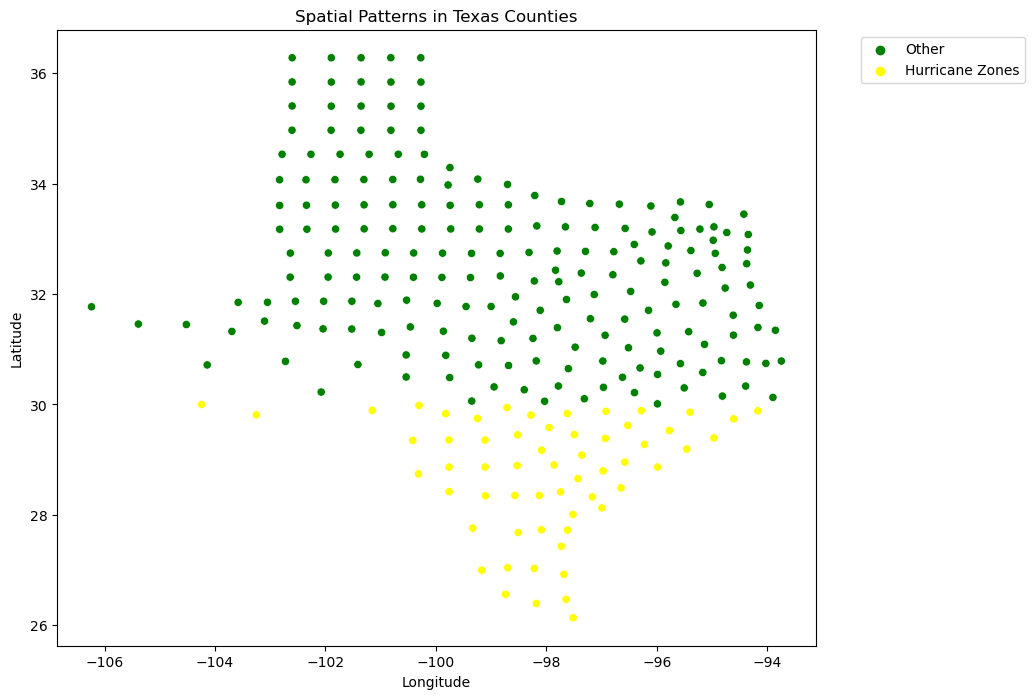

In [6]:
gis_data['Latitude_Range']= gis_data['X_Latitude'].apply(lambda x:'Hurricane Zones'if 5 <= x <=30 else 'Other')

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Y_Longitude', y='X_Latitude', data=gis_data, hue='Latitude_Range', palette=['green', 'yellow'])
plt.title('Spatial Patterns in Texas Counties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

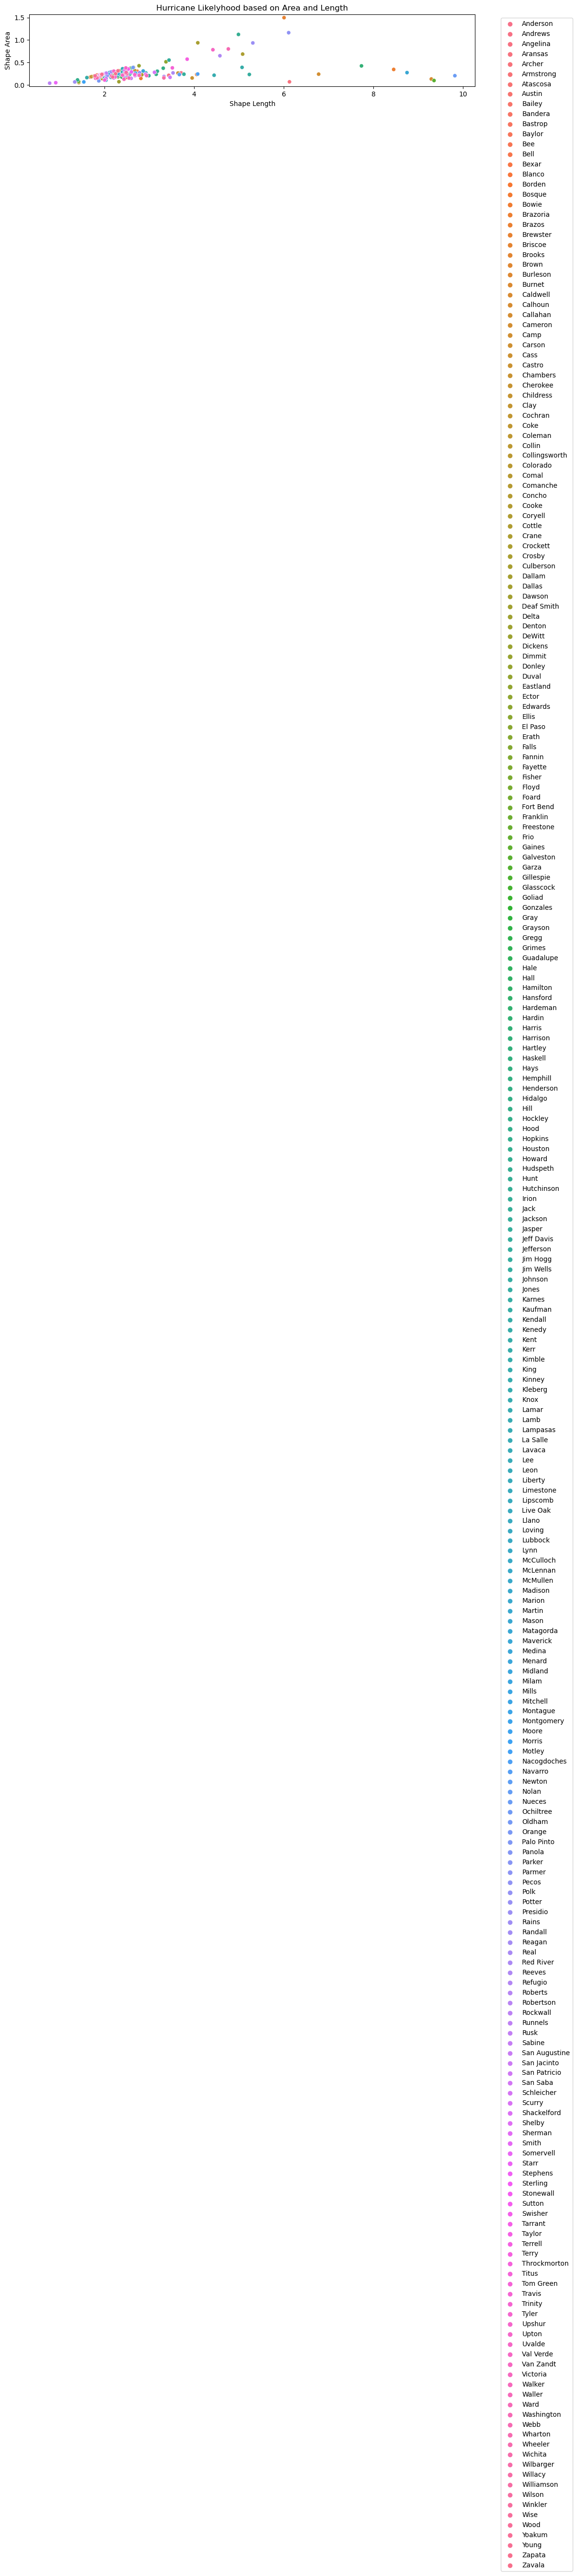

In [3]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Shape_Length', y='Shape_Area', data=gis_data, hue='County')
plt.title('Hurricane Likelyhood based on Area and Length')
plt.xlabel('Shape Length')
plt.ylabel('Shape Area')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

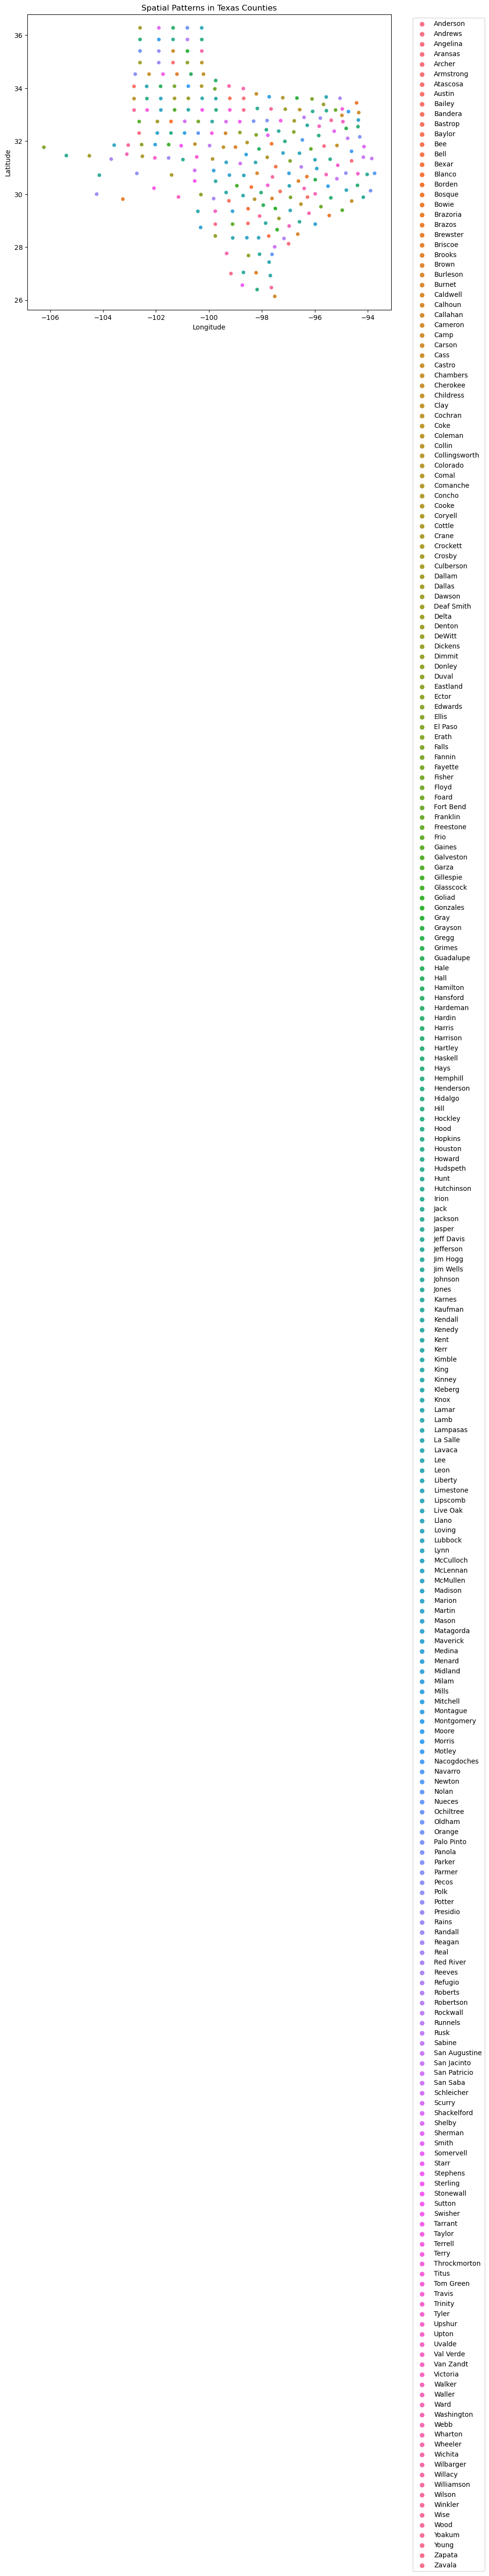

In [8]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Y_Longitude', y='X_Latitude', data=gis_data, hue='County')
plt.title('Spatial Patterns in Texas Counties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [10]:
grp = gis_data.groupby('County')[['Shape_Length', 'Shape_Area']].describe()
grp

Shape_Length                                                        \
                count      mean std       min       25%       50%       75%   
County                                                                        
Anderson          1.0  3.709381 NaN  3.709381  3.709381  3.709381  3.709381   
Andrews           1.0  2.579602 NaN  2.579602  2.579602  2.579602  2.579602   
Angelina          1.0  3.432799 NaN  3.432799  3.432799  3.432799  3.432799   
Aransas           1.0  6.125350 NaN  6.125350  6.125350  6.125350  6.125350   
Archer            1.0  1.941220 NaN  1.941220  1.941220  1.941220  1.941220   
...               ...       ...  ..       ...       ...       ...       ...   
Wood              1.0  2.181601 NaN  2.181601  2.181601  2.181601  2.181601   
Yoakum            1.0  1.791577 NaN  1.791577  1.791577  1.791577  1.791577   
Young             1.0  1.941651 NaN  1.941651  1.941651  1.941651  1.941651   
Zapata            1.0  2.246982 NaN  2.246982  2.246982  2.246982  2.246982   
Zavala            1.0  2.300184 NaN  2.300184  2.300184  2.300184  2.300184   

                   Shape_Area                                              \
               max      count      mean std       min       25%       50%   
County                                                                      
Anderson  3.709381        1.0  0.265992 NaN  0.265992  0.265992  0.265992   
Andrews   2.579602        1.0  0.372269 NaN  0.372269  0.372269  0.372269   
Angelina  3.432799        1.0  0.212057 NaN  0.212057  0.212057  0.212057   
Aransas   6.125350        1.0  0.067118 NaN  0.067118  0.067118  0.067118   
Archer    1.941220        1.0  0.232834 NaN  0.232834  0.232834  0.232834   
...            ...        ...       ...  ..       ...       ...       ...   
Wood      2.181601        1.0  0.173380 NaN  0.173380  0.173380  0.173380   
Yoakum    1.791577        1.0  0.200360 NaN  0.200360  0.200360  0.200360   
Young     1.941651        1.0  0.233022 NaN  0.233022  0.233022  0.233022   
Zapata    2.246982        1.0  0.249215 NaN  0.249215  0.249215  0.249215   
Zavala    2.300184        1.0  0.311031 NaN  0.311031  0.311031  0.311031   

                              
               75%       max  
County                        
Anderson  0.265992  0.265992  
Andrews   0.372269  0.372269  
Angelina  0.212057  0.212057  
Aransas   0.067118  0.067118  
Archer    0.232834  0.232834  
...            ...       ...  
Wood      0.173380  0.173380  
Yoakum    0.200360  0.200360  
Young     0.233022  0.233022  
Zapata    0.249215  0.249215  
Zavala    0.311031  0.311031  

[254 rows x 16 columns]

/Users/daniellebalque/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


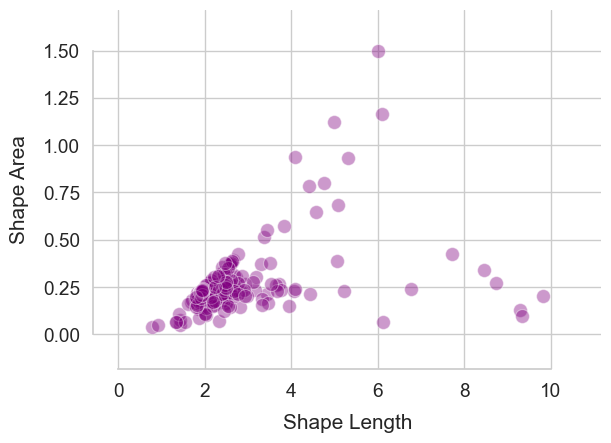

In [20]:
sns.set_theme(style="whitegrid", font_scale=1.25)

# Plotting
fg = sns.relplot(
    data=gis_data,
    x="Shape_Length", y="Shape_Area", color = 'purple',
    marker="o", s=100, alpha=0.4
)

# Set axis labels
fg.set_axis_labels("Shape Length", "Shape Area", labelpad=10)

# Set figure size and margins
fg.figure.set_size_inches(6.5, 4.5)
fg.ax.margins(.15)

# Remove spines
fg.despine(trim=True)

plt.show()

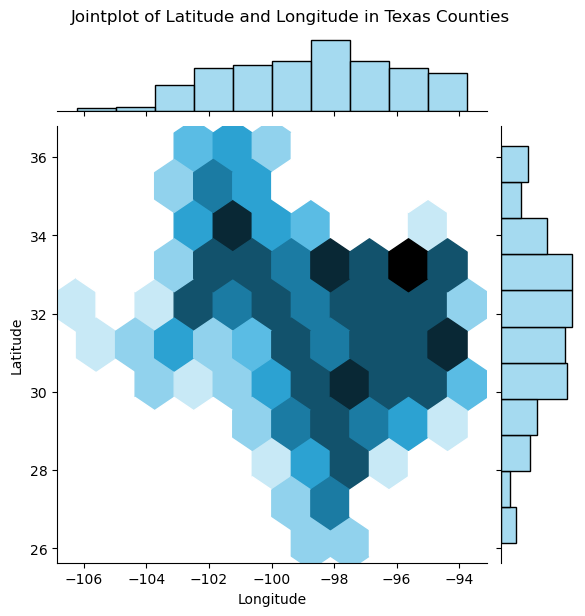

In [15]:
joint_plot = sns.jointplot(x='Y_Longitude', y='X_Latitude', data=gis_data, kind='hex', color='skyblue')
joint_plot.fig.suptitle('Jointplot of Latitude and Longitude in Texas Counties', y=1.02)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/Users/daniellebalque/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


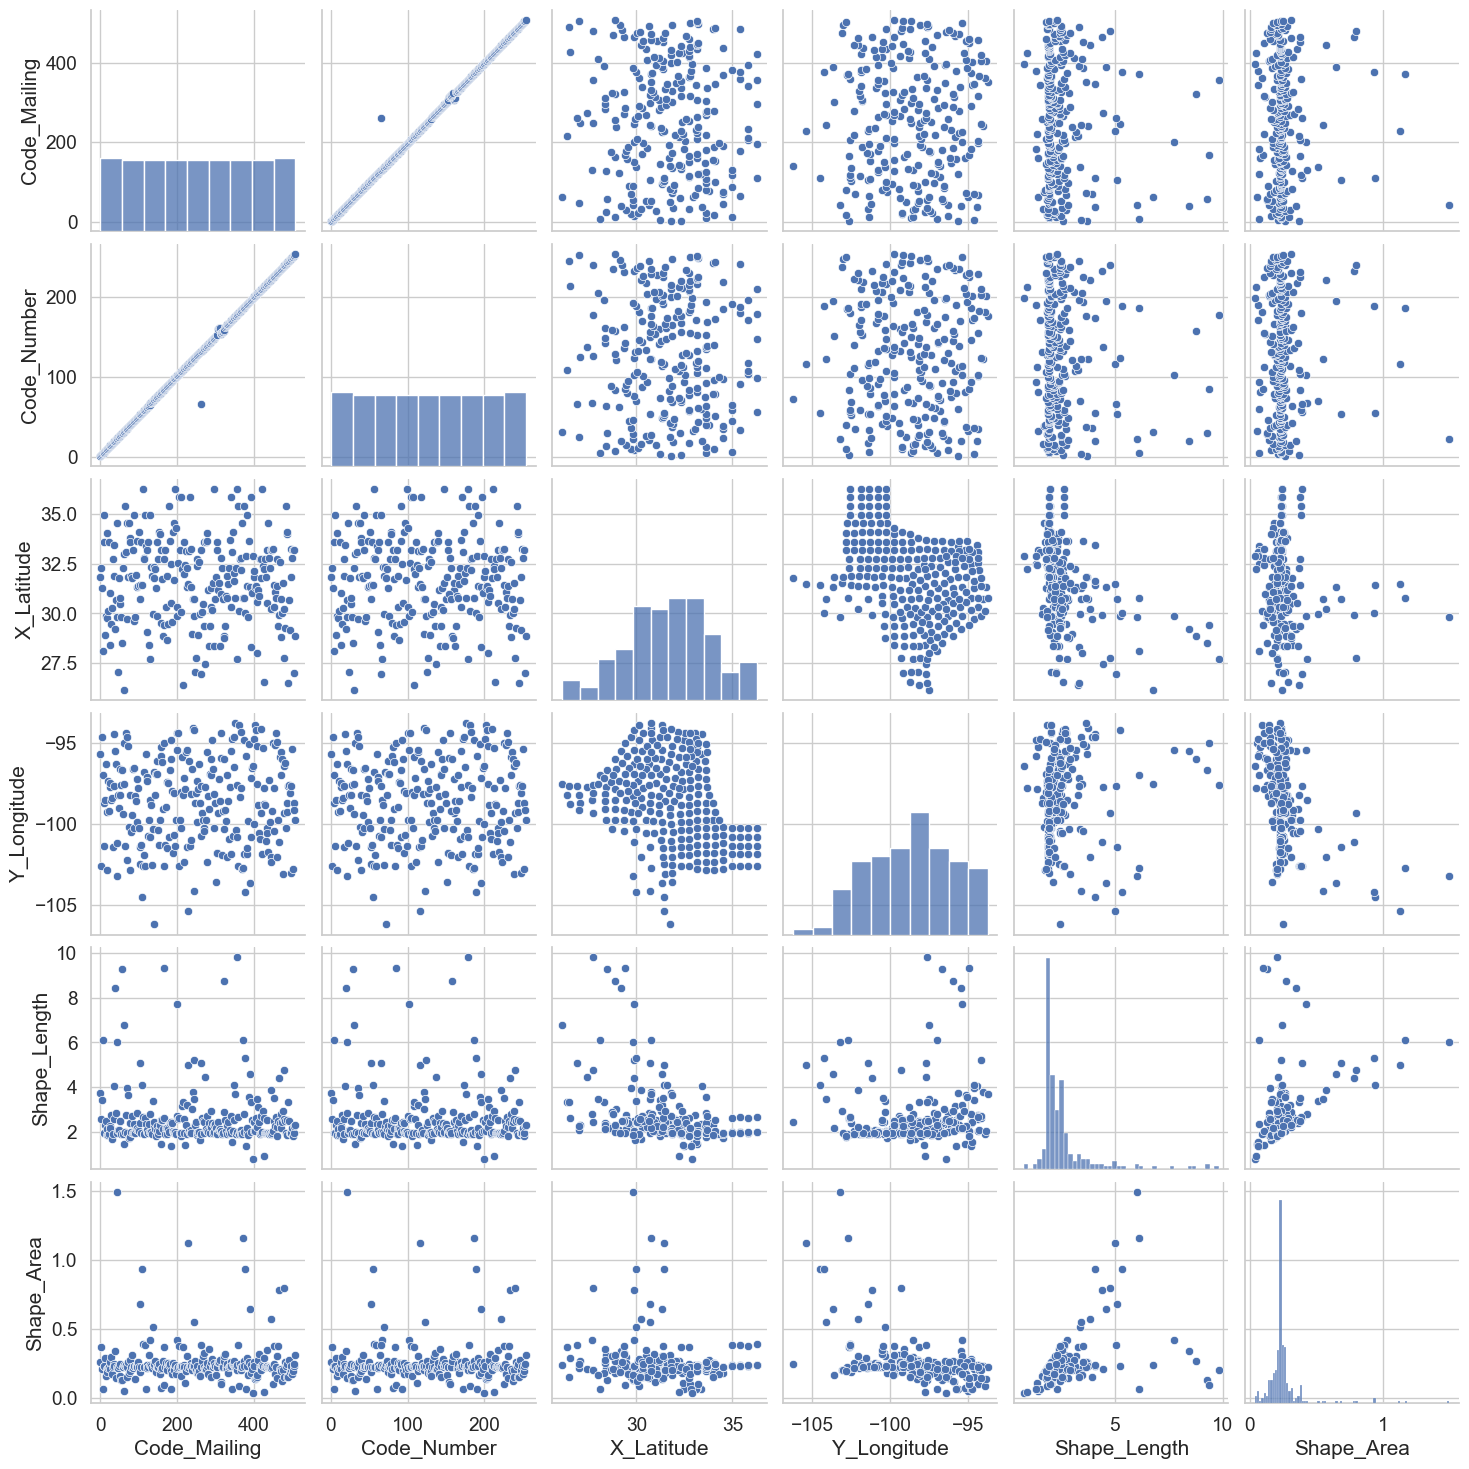

In [25]:
sns.set_theme(style="whitegrid", font_scale=1.25)

numeric_columns = gis_data.select_dtypes(include=['float64', 'int64'])

sns.pairplot(numeric_columns)

plt.show()